In [1]:
import numpy as np
import ode_toy_model
from sklearn.metrics import r2_score
from copy import deepcopy

import GA
import smc_abc
import smc_abc_ours
from sklearn.metrics import mean_squared_error as MSE
import pyabc
import time
import matplotlib.pyplot as plt
from scipy import optimize
import pickle

In [41]:
import importlib
importlib.reload(GA)
importlib.reload(smc_abc)
importlib.reload(smc_abc_ours)

<module 'smc_abc_ours' from '/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/smc_abc_ours.py'>

In [2]:
def model(param):
    # param: {'p0':,'p1':,...}
    p = np.array([param['p{0}'.format(i)] for i in range(len(param))])

    sol_exp = ode_toy_model.do_solve_ivp(t_span, y0, theta=p)
    return {'data':sol_exp.y}

(6, 100)
MSE exp vs true: 24.967860342677522


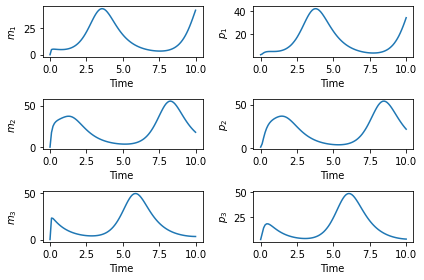

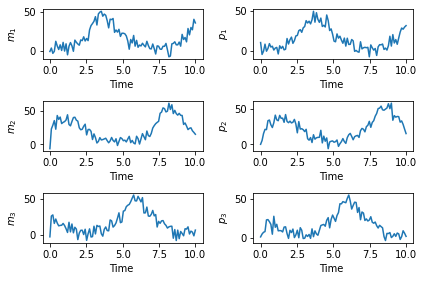

In [3]:
t_span = np.linspace(0, 10, 100)
y0 = [0, 2, 0, 1, 0, 3]  # ref
true_params = {'p{0}'.format(i):v for i,v in enumerate([1, 2, 5, 1000])} # ref

y_true = model(true_params)
y_exp = deepcopy(y_true)
print( y_exp['data'].shape)
y_exp['data'] += np.random.normal(0, 5, y_exp['data'].shape)

min_dist = ode_toy_model.distance(y_exp,y_true)
print('MSE exp vs true:',min_dist)


ode_toy_model.plot_sol(t_span,y_true['data'],'../figures/ode_exp.pdf')
ode_toy_model.plot_sol(t_span,y_exp['data'],'../figures/ode_exp.pdf')
np.random.seed()

In [4]:
## define priors
priors1 = pyabc.Distribution(**{'p0': pyabc.RV('uniform',-2,10),
                                'p1': pyabc.RV('uniform',0,10),
                                'p2': pyabc.RV('uniform',-5,20),
                                'p3': pyabc.RV('uniform',500,2500)})

priors2 = {'p0': smc_abc_ours.RV('uniform',-2,10),
           'p1': smc_abc_ours.RV('uniform',0,10),
           'p2': smc_abc_ours.RV('uniform',-5,20),
           'p3': smc_abc_ours.RV('uniform',500,2500)}

priors1 = pyabc.Distribution(**{'p0': pyabc.RV('norm',5,3),
                                'p1': pyabc.RV('norm',5,3),
                                'p2': pyabc.RV('norm',5,3),
                                'p3': pyabc.RV('norm',1000,500)})

priors2 = {'p0': smc_abc_ours.RV('normal',5,3),
           'p1': smc_abc_ours.RV('normal',5,3),
           'p2': smc_abc_ours.RV('normal',5,3),
           'p3': smc_abc_ours.RV('normal',1000,500)}

In [5]:
# algrithms settings
population_size = 100
max_ite = 200
dist_func = ode_toy_model.distance

In [6]:
ga = GA.GA(model,
     dist_func,
     y_exp,
     priors2,
     population_size=population_size, 
     mutation_rate=0.1,
     mutation_scale={'p0':0.01,'p1': 0.01,'p2':0.1,'p3':10},
     max_ite=max_ite,
     min_dist=min_dist
     )
t0 = time.time()
ga.run()
print('GA time:',time.time()-t0)

/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:51: RuntimeWarning: invalid value encountered in double_scalars
  dydt[2] = -m2 + a / (1 + p1 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:51: RuntimeWarning: invalid value encountered in double_scalars
  dydt[2] = -m2 + a / (1 + p1 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:53: RuntimeWarning: invalid value encountered in double_scalars
  dydt[4] = -m3 + a / (1 + p2 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/

/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:51: RuntimeWarning: invalid value encountered in double_scalars
  dydt[2] = -m2 + a / (1 + p1 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:53: RuntimeWarning: invalid value encountered in double_scalars
  dydt[4] = -m3 + a / (1 + p2 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:53: RuntimeWarning: invalid value encountered in double_scalars
  dydt[4] = -m3 + a / (1 + p2 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/

t2: 4362.738572485694


/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:53: RuntimeWarning: invalid value encountered in double_scalars
  dydt[4] = -m3 + a / (1 + p2 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:51: RuntimeWarning: invalid value encountered in double_scalars
  dydt[2] = -m2 + a / (1 + p1 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/

t3: 2292.3671962224626


/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:51: RuntimeWarning: invalid value encountered in double_scalars
  dydt[2] = -m2 + a / (1 + p1 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:53: RuntimeWarning: invalid value encountered in double_scalars
  dydt[4] = -m3 + a / (1 + p2 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:51: RuntimeWarning: invalid value encountered in double_scalars
  dydt[2] = -m2 + a / (1 + p1 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/

t4: 1387.7815923658145


/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:53: RuntimeWarning: invalid value encountered in double_scalars
  dydt[4] = -m3 + a / (1 + p2 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/

t5: 1484.3775260309167


/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/

t6: 665.6331194882926


/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:51: RuntimeWarning: invalid value encountered in double_scalars
  dydt[2] = -m2 + a / (1 + p1 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:53: RuntimeWarning: invalid value encountered in double_scalars
  dydt[4] = -m3 + a / (1 + p2 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/

t7: 587.9066315973225


/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:51: RuntimeWarning: invalid value encountered in double_scalars
  dydt[2] = -m2 + a / (1 + p1 ** n) + a0


t8: 477.9995930289712


/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:53: RuntimeWarning: invalid value encountered in double_scalars
  dydt[4] = -m3 + a / (1 + p2 ** n) + a0


t9: 429.86567942784177
t10: 427.70833004764586
t11: 490.4938523455056
t12: 528.07336506875
t13: 474.60577194662187
t14: 459.74590928147967
t15: 373.198069928091
t16: 369.07111861769886
t17: 322.63186524768923
t18: 333.6422851550815
t19: 328.2898773667071
t20: 321.5875625679671
t21: 284.4845505883744
t22: 274.853313253391
t23: 280.05207981530015
t24: 274.02723079742344
t25: 272.6421106152854
t26: 259.9617619634065
t27: 259.90112596442214
t28: 248.23156365737202
t29: 247.9786939984065
t30: 246.6200865877629
t31: 245.91845600439177
t32: 246.40287104801155
t33: 246.3149253206548
t34: 240.36863004047882
t35: 238.82228256917665
t36: 169.3527166676954
t37: 149.59889405551024
t38: 138.53111254631506
t39: 137.0123641977808
t40: 137.19070952696114
t41: 131.36924446538092
t42: 130.71078390913823
t43: 120.03858549774401
t44: 113.64009328615302
t45: 110.9148081176175
t46: 105.80519118503943
t47: 105.76145921286042
t48: 105.06032265690979
t49: 104.28829951504399
t50: 103.75304785743278
t51: 95.58256

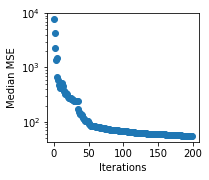

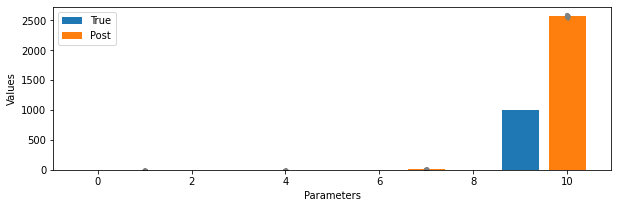

In [42]:
GA.plot_training_curve(ga,'../figures/case5_ga.pdf',True)
GA.plot_params_bar(true_params,ga)

In [8]:
smcabc_lit = smc_abc.smc_abc(model,
           dist_func,
           y_exp,
           priors1,
           population_size,
           min_dist=min_dist,
           max_ite=max_ite)
t0 = time.time()
smcabc_lit.run()
print('SMC-ABC classical:',time.time()-t0)

INFO:History:Start <ABCSMC(id=32, start_time=2020-09-30 23:52:09.830998, end_time=None)>
INFO:ABC:Calibration sample before t=0.
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:53: RuntimeWarning: invalid value encountered in double_scalars
  dydt[4] = -m3 + a / (1 + p2 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:51: RuntimeWarning: invalid value encountered in double_scalars
  dydt[2] = -m2 + a / (1 + p1 ** n) + a0
INFO:Epsilon:initial epsilon is 60114.08409681268
INFO:ABC:t: 0, eps: 60114.08409681268.
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/g

/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:53: RuntimeWarning: invalid value encountered in double_scalars
  dydt[4] = -m3 + a / (1 + p2 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:51: RuntimeWarning: invalid value encountered in double_scalars
  dydt[2] = -m2 + a / (1 + p1 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/

/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/

INFO:ABC:t: 8, eps: 97.56728192554894.
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:53: RuntimeWarning: invalid value encountered in double_scalars
  dydt[4] = -m3 + a / (1 + p2 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:51: RuntimeWarning: invalid value encountered in double_scalars
  dydt[2] = -m2 + a / (1 + p1 ** n) + a0
INFO:ABC:Acceptance rate: 100 / 296 = 3.3784e-01, ESS=7.4218e+01.
INFO:ABC:t: 9, eps: 76.23886634519089.
INFO:ABC:Acceptance rate: 100 / 297 = 3.3670e-01, ESS=8.5445e+01.
INFO:ABC:t: 10, eps: 61.14372953893514.
INFO:ABC:Acceptance rate: 100 / 312 = 3.2051e-01, ESS=8.7981e+01.
INFO:ABC:t: 11, eps: 49.516152425475504.
INFO:ABC:Acceptance rate: 100 / 355 = 2.8169e-01, ESS=1.7342e+01.
INFO:ABC:t: 12, eps: 45.54525304369768.
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:53: RuntimeWarning: invalid value encountered in double_scalars
  dyd

SMC-ABC classical: 74.02202153205872


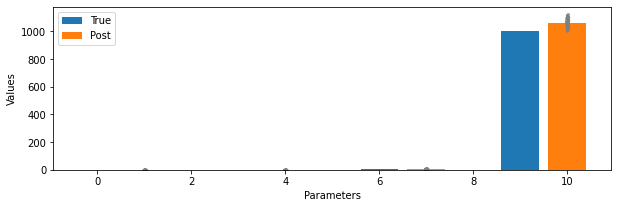

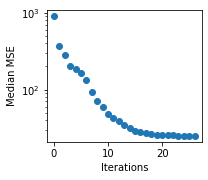

In [44]:
smc_abc.plot_params_bar(smcabc_lit,true_params)
smc_abc.plot_training_curve(smcabc_lit,'../figures/case5_smc_abc_classic.pdf',True)

In [10]:
smcabc_ours = smc_abc_ours.smc_abc_ours(model,
               priors2.copy(),
               min_dist,
               population_size,
               distance_function=dist_func,
               Yobs=y_exp,
               max_iter=max_ite,
               cores=4,
               generation_size=population_size)

t0=time.time()
smcabc_ours.run_simulation()
print('SMC-ABC this work:',time.time()-t0)

/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:51: RuntimeWarning: invalid value encountered in double_scalars
  dydt[2] = -m2 + a / (1 + p1 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:51: RuntimeWarning: invalid value encountered in double_scalars
  dydt[2] = -m2 + a / (1 + p1 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:51: RuntimeWarning: invalid value encountered in double_scalars
  dydt[2] = -m2 + a / (1 + p1 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/

/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:53: RuntimeWarning: invalid value encountered in double_scalars
  dydt[4] = -m3 + a / (1 + p2 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:51: RuntimeWarning: invalid value encountered in double_scalars
  dydt[2] = -m2 + a / (1 + p1 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/

updating population
t1: epsilon= 77089.16363145842
Updating prior


/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:51: RuntimeWarning: invalid value encountered in double_scalars
  dydt[2] = -m2 + a / (1 + p1 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/

updating population
t2: epsilon= 856.109874110633
Updating prior


/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:51: RuntimeWarning: invalid value encountered in double_scalars
  dydt[2] = -m2 + a / (1 + p1 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:53: RuntimeWarning: invalid value encountered in double_scalars
  dydt[4] = -m3 + a / (1 + p2 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:53: RuntimeWarning: invalid value encountered in double_scalars
  dydt[4] = -m3 + a / (1 + p2 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/

updating population
t3: epsilon= 398.06395794092685
Updating prior


/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:51: RuntimeWarning: invalid value encountered in double_scalars
  dydt[2] = -m2 + a / (1 + p1 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:51: RuntimeWarning: invalid value encountered in double_scalars
  dydt[2] = -m2 + a / (1 + p1 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:53: RuntimeWarning: invalid value encountered in double_scalars
  dydt[4] = -m3 + a / (1 + p2 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/

updating population
t4: epsilon= 324.4346507963493
Updating prior


/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:51: RuntimeWarning: invalid value encountered in double_scalars
  dydt[2] = -m2 + a / (1 + p1 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:53: RuntimeWarning: invalid value encountered in double_scalars
  dydt[4] = -m3 + a / (1 + p2 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:53: RuntimeWarning: invalid value encountered in double_scalars
  dydt[4] = -m3 + a / (1 + p2 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/

updating population
t5: epsilon= 278.86543290155464
Updating prior


/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:51: RuntimeWarning: invalid value encountered in double_scalars
  dydt[2] = -m2 + a / (1 + p1 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:53: RuntimeWarning: invalid value encountered in double_scalars
  dydt[4] = -m3 + a / (1 + p2 ** n) + a0


updating population
t6: epsilon= 225.45662209588016
Updating prior


/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:53: RuntimeWarning: invalid value encountered in double_scalars
  dydt[4] = -m3 + a / (1 + p2 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:51: RuntimeWarning: invalid value encountered in double_scalars
  dydt[2] = -m2 + a / (1 + p1 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:53: RuntimeWarning: invalid value encountered in double_scalars
  dydt[4] = -m3 + a / (1 + p2 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/

updating population
t7: epsilon= 198.19470332766286
Updating prior


/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:53: RuntimeWarning: invalid value encountered in double_scalars
  dydt[4] = -m3 + a / (1 + p2 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:49: RuntimeWarning: invalid value encountered in double_scalars
  dydt[0] = -m1 + a / (1 + p3 ** n) + a0
/cephyr/NOBACKUP/groups/snic2020-8-46/GitHub/overfitting/simulations/ode_toy_model.py:53: RuntimeWarning: invalid value encountered in double_scalars
  dydt[4] = -m3 + a / (1 + p2 ** n) + a0


updating population
t8: epsilon= 183.99328119438982
Updating prior
updating population
t9: epsilon= 161.33225210470022
Updating prior
updating population
t10: epsilon= 146.43667630398616
Updating prior
updating population
t11: epsilon= 122.23715873367962
Updating prior
updating population
t12: epsilon= 91.84393138686242
Updating prior
updating population
t13: epsilon= 78.38330322046922
Updating prior
updating population
t14: epsilon= 69.31777683999731
Updating prior
updating population
t15: epsilon= 59.265216292556374
Updating prior
updating population
t16: epsilon= 51.463639875928635
Updating prior
updating population
t17: epsilon= 47.12718570989727
Updating prior
updating population
t18: epsilon= 43.485902833696144
Updating prior
updating population
t19: epsilon= 41.45603919248244
Updating prior
updating population
t20: epsilon= 38.83877819620484
Updating prior
updating population
t21: epsilon= 36.767695616035496
Updating prior
updating population
t22: epsilon= 35.501899621872035
Upd

updating population
t129: epsilon= 25.860129427011856
Updating prior
updating population
t130: epsilon= 25.86011861788994
Updating prior
updating population
t131: epsilon= 25.860110432101052
Updating prior
updating population
t132: epsilon= 25.860101281752282
Updating prior
updating population
t133: epsilon= 25.860094210983885
Updating prior
updating population
t134: epsilon= 25.860087146030203
Updating prior
updating population
t135: epsilon= 25.860078620285083
Updating prior
updating population
t136: epsilon= 25.86007032620367
Updating prior
updating population
t137: epsilon= 25.860064325443524
Updating prior
updating population
t138: epsilon= 25.860059308983992
Updating prior
updating population
t139: epsilon= 25.86005382227068
Updating prior
updating population
t140: epsilon= 25.860048873384535
Updating prior
updating population
t141: epsilon= 25.860042432423164
Updating prior
updating population
t142: epsilon= 25.860039148542945
Updating prior
updating population
t143: epsilon= 25

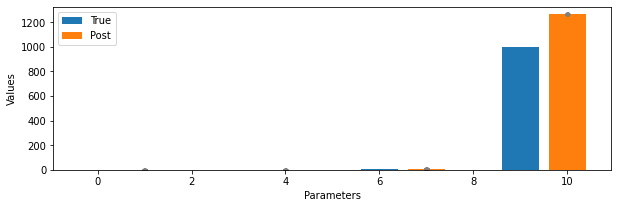

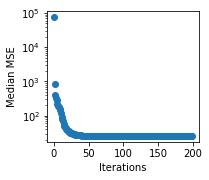

In [45]:
smc_abc_ours.plot_params_bar(true_params,smcabc_ours)
smc_abc_ours.plot_training_curve(smcabc_ours,'../figures/case5_smc_abc_this_work.pdf',True)

In [12]:
def compare_params_hist(true_params,ga, smcabc_lit,smcabc_ours,outname=None):
    cols = list(true_params.keys())
    cols.sort()
    pos = np.arange(len(true_params))*6
    df,w = smcabc_lit.history.get_distribution()
    
    plt.figure(figsize=(10.5,2.5))
    for i,col in enumerate(cols):
        plt.subplot(1,4,i+1)
        plt.plot([true_params[col]]*2,[0,25],label='True',color='k')
        
        plt.hist([item.genes[col] for item in ga.population],label='GA',alpha=0.5)
        plt.hist(df[col],label='Classic SMC-ABC',alpha=0.5)
        #plt.hist([item[col] for item in smcabc_ours.population],1,label='This work',alpha=0.5)
        plt.plot([np.mean([item[col] for item in smcabc_ours.population])]*2,[0,25],label='This work')
    
    labels = [r'$\alpha$$_0$',r'$n$',r'$\beta$',r'$\alpha$']
    for i in range(len(cols)):
        plt.subplot(1,4,i+1)
        if i==3: plt.legend(bbox_to_anchor=(1.01,1))
        plt.xlabel(labels[i])
        plt.ylabel('Counts')
    plt.tight_layout()
    if outname is not None: plt.savefig(outname)
    plt.show()

In [38]:
def compare_param_pair(true_params,smcabc_lit,outname=None):
    cols = list(true_params.keys())
    cols.sort()
    
    df,w = smcabc_lit.history.get_distribution()
    
    labels = [r'$\alpha$$_0$',r'$n$',r'$\beta$',r'$\alpha$']
    n = 0
    plt.figure(figsize=(8,6))
    for i,col1 in enumerate(cols):
        for j,col2 in enumerate(cols):
            n+=1
            if i<=j: continue
            plt.subplot(len(cols),len(cols),n)
            plt.scatter(df[col2],df[col1],s=3)
            if n%4==1: plt.ylabel(labels[i])
            else: plt.yticks([])
            if n>12: plt.xlabel(labels[j])
            else: plt.xticks([])
    plt.tight_layout()
    if outname is not None: plt.savefig(outname)
    plt.show()

/cephyr/users/gangl/Vera/Tools/my_python3_vera/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


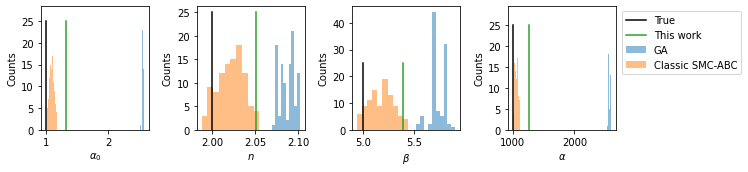

In [13]:
compare_params_hist(true_params,ga, smcabc_lit,smcabc_ours=smcabc_ours,outname='../figures/case5_param_dist.pdf')

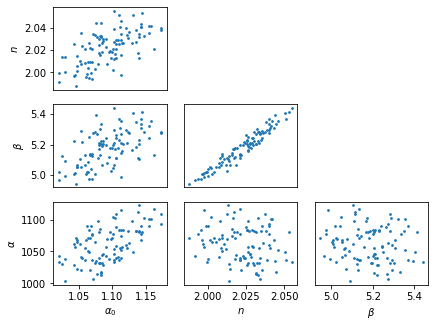

In [40]:
 compare_param_pair(true_params,smcabc_lit,outname='../figures/case5_param_pair.pdf')